# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

Customers today have more information, so their buying habits have changed. Airlines need to attract customers before their trips, not at the airport, by using data and predictive models.

The goal is to prepare customer booking data to create a model that predicts who might buy holidays. It's also important to check how well the model works and understand which data features are most helpful for making predictions. This helps improve the model and use it effectively.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
# df.info()
chan=df["sales_channel"].unique()
chan

array(['Internet', 'Mobile'], dtype=object)

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.sample(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
45079,2,Internet,RoundTrip,43,6,13,4,DPSHGH,Indonesia,1,0,1,5.07,1
27464,2,Internet,RoundTrip,154,3,2,1,DPSPUS,South Korea,0,0,0,6.33,0
28421,1,Mobile,RoundTrip,119,3,11,5,KIXPEN,Japan,0,1,0,7.00,0


## EDA 

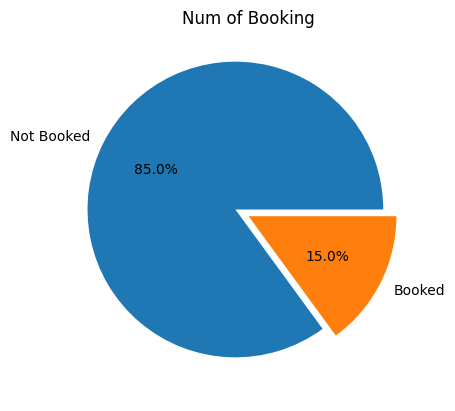

In [9]:
booking_counts=df['booking_complete'].value_counts()
explode = [0.1, 0]  # This will "explode" the first slice, i.e., 'Booked'
plt.pie(booking_counts,autopct="%1.1f%%",labels=['Not Booked','Booked'],explode=explode)
plt.title('Num of Booking')
plt.show()


15% booked 
85%not booked

In [10]:
booking_counts

booking_complete
0    42522
1     7478
Name: count, dtype: int64

## q1 num of sales channel which has more booking
- internet(websites) or mobile (apps)

In [11]:
sales_channel_booking=df[df['booking_complete']==1].groupby(['sales_channel']).size()
sales_channel_booking


sales_channel
Internet    6869
Mobile       609
dtype: int64

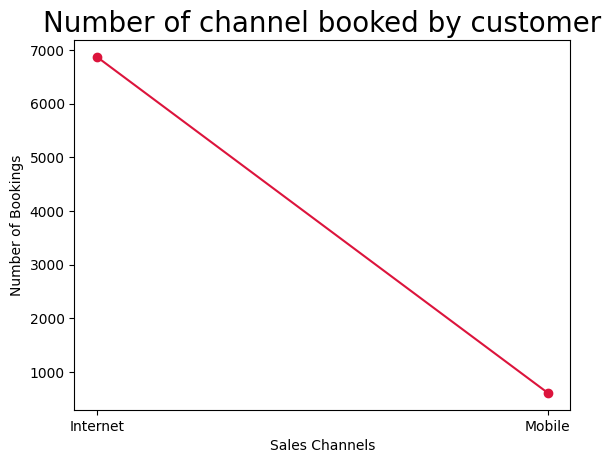

In [12]:
plt.plot(sales_channel_booking,marker='o',color="crimson")
plt.title('Number of channel booked by customer',fontsize=20)
plt.ylabel('Number of Bookings')  # Specify what the y-axis represents
plt.xlabel('Sales Channels')  # You may want to label the x-axis too if appropriate
plt.show()

### conclusion
- Internet        more booking
- Mobile          less booking

## q2 which trip type mostly customer preffer.


In [13]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [14]:
trip_type_booked=df[df['booking_complete']==1].groupby(['trip_type']).size()
trip_type_booked

trip_type
CircleTrip       5
OneWay          20
RoundTrip     7453
dtype: int64

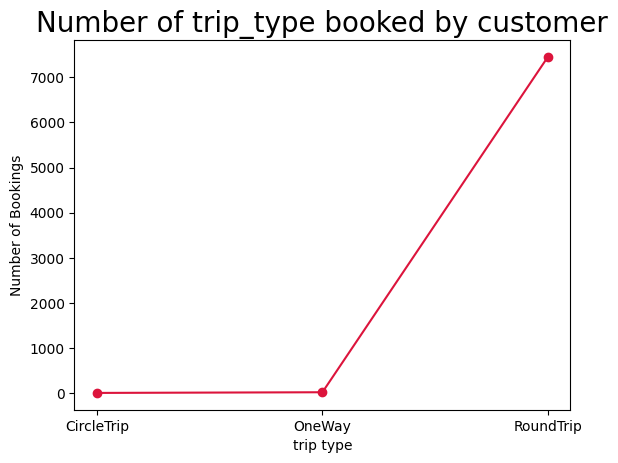

In [15]:
plt.plot(trip_type_booked,marker='o',color="crimson")
plt.title('Number of trip_type booked by customer',fontsize=20)
plt.ylabel('Number of Bookings')  # Specify what the y-axis represents
plt.xlabel('trip type')  # You may want to label the x-axis too if appropriate
plt.show()

## conclusion 
- round trip: has more bookings 
- one way
- circle trip

## q3 whether customer books flight in advance or urgent.

In [16]:
advance_booking=df[df['booking_complete']==1].groupby(['purchase_lead']).size()
advance_booking

purchase_lead
0       42
1      102
2      120
3      114
4      121
      ... 
440      1
442      1
444      1
641      1
867      1
Length: 424, dtype: int64

Text(0, 0.5, 'Frequency')

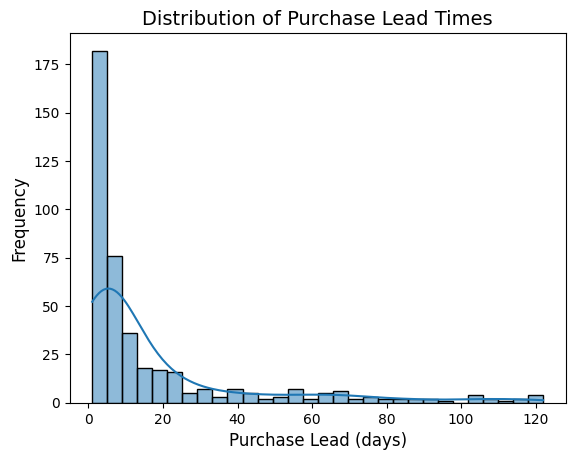

In [54]:
sns.histplot(advance_booking,kde=True)
# Add labels and title
plt.title('Distribution of Purchase Lead Times', fontsize=14)
plt.xlabel('Purchase Lead (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

## conclusion
- mostly people booked flight in advanced 20 days before travelling.

## q4 number of passenger staying.


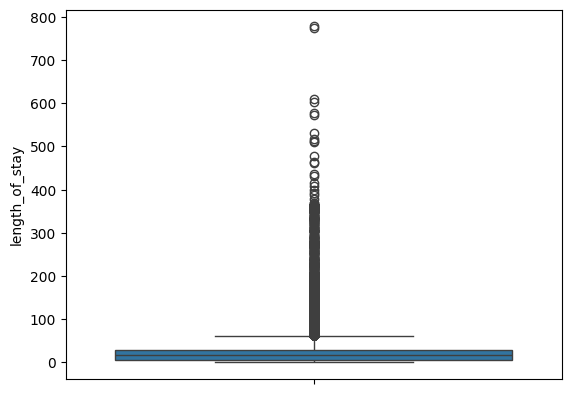

In [18]:
# Outlier
sns.boxplot(df['length_of_stay'])
plt.show()

In [19]:
duration_of_holidays=df[df['num_passengers']==1].groupby(['length_of_stay']).size()
duration_of_holidays

length_of_stay
0         5
1       209
2       699
3      1922
4      3206
       ... 
532       1
573       1
577       1
610       1
778       1
Length: 313, dtype: int64

Text(0, 0.5, 'passenger')

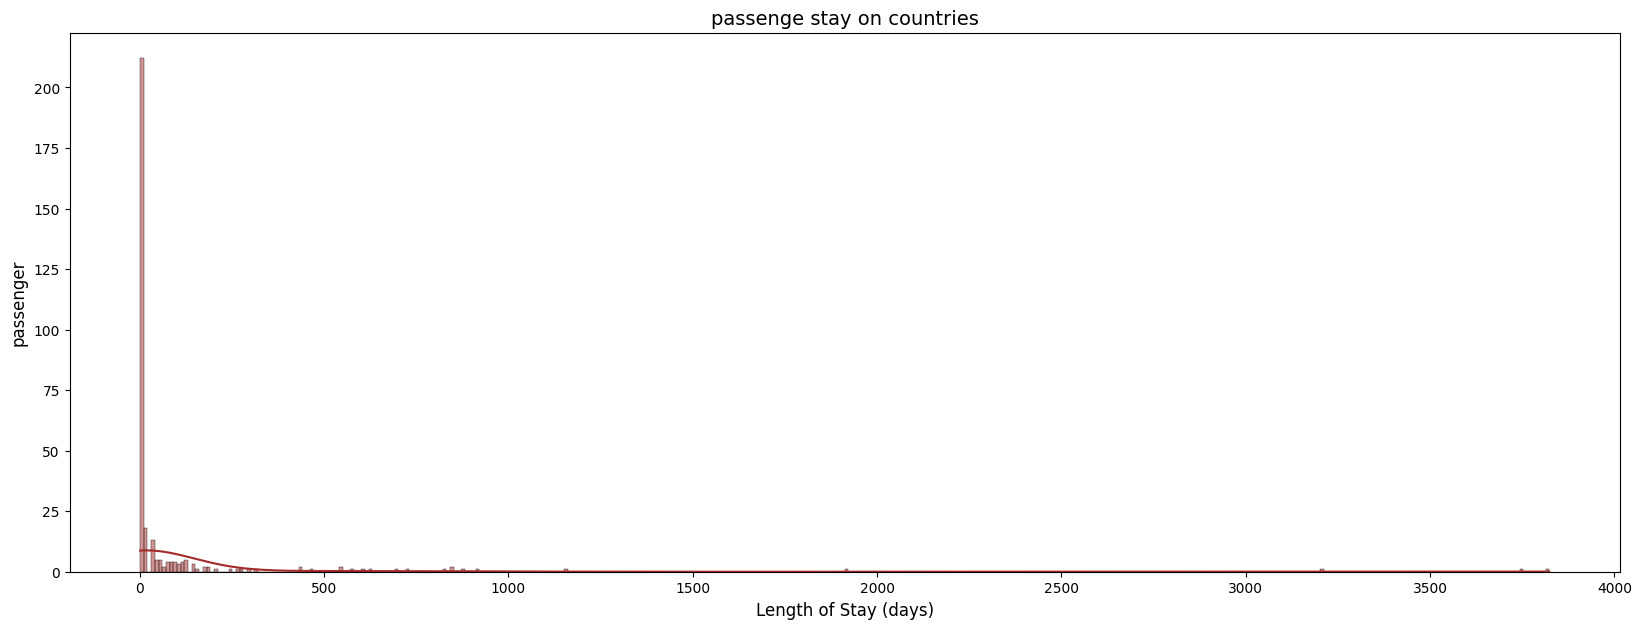

In [20]:
plt.figure(figsize=(20,7))
sns.histplot(duration_of_holidays,kde=True, color="brown")
# Add title and labels
plt.title("passenge stay on countries", fontsize=14)
plt.xlabel("Length of Stay (days)", fontsize=12)
plt.ylabel("passenger", fontsize=12)

### conclusion
- max duration: 3828
- min duration : 1

# Feature engineering


In [21]:
# Select only columns with int dtype
int_columns = df.select_dtypes(include='int')
matrix_corr=int_columns.corr()
matrix_corr['booking_complete'].sort_values(ascending=False)

booking_complete         1.000000
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
num_passengers           0.024116
flight_hour              0.007127
flight_day              -0.006986
purchase_lead           -0.022131
length_of_stay          -0.042408
Name: booking_complete, dtype: float64

In [22]:
obj_col=df.select_dtypes(include='object').columns
obj_col

Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

In [23]:
# Converting the obj into int.

In [24]:
# List of columns to check unique values
obj_col = ['sales_channel', 'trip_type', 'route', 'booking_origin']

In [25]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'sales_channel'
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])


In [27]:
df['trip_type']=label_encoder.fit_transform(df['trip_type'])

sales_channel (encoded)
trip_type (encoded)
purchase_lead
length_of_stay
num_passengers
flight_hour 
flight_day

In [28]:

delete=['wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals','route','booking_origin','flight_duration']
df=df.drop(columns=delete,axis=1)

In [29]:
df.shape

(50000, 8)

## remove the outliers


In [30]:
# Calculate the IQR for stay
q1=df['length_of_stay'].quantile(0.25)
q3=df['length_of_stay'].quantile(0.75)
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
# Filter the DataFrame to remove outliers 
df=df[(df['length_of_stay'] >= min_range) & (df['length_of_stay'] <= max_range)]
df
print(f"Q1: {q1}, Q3: {q3}, IQR: {IQR}")
print(f"Min Range: {min_range}, Max Range: {max_range}")


Q1: 5.0, Q3: 28.0, IQR: 23.0
Min Range: -29.5, Max Range: 62.5


In [31]:
q1=df['purchase_lead'].quantile(0.25)
q3=df['purchase_lead'].quantile(0.75)
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
# Filter the DataFrame to remove outliers 
df=df[(df['purchase_lead'] >= min_range) & (df['purchase_lead'] <= max_range)]
df
print(f"Q1: {q1}, Q3: {q3}, IQR: {IQR}")
print(f"Min Range: {min_range}, Max Range: {max_range}")

Q1: 22.0, Q3: 119.0, IQR: 97.0
Min Range: -123.5, Max Range: 264.5


In [32]:
# sns.pairplot(df,hue="booking_complete")

In [33]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_complete
count,43123.000000,43123.000000,43123.000000,43123.000000,43123.000000,43123.000000,43123.000000,43123.000000
mean,1.582497,0.116202,1.987663,69.477448,15.954989,9.070334,3.805927,0.150314
std,1.011749,0.320471,0.128626,64.378190,14.164985,5.384079,1.970227,0.357383
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,2.000000,20.000000,5.000000,5.000000,2.000000,0.000000
50%,1.000000,0.000000,2.000000,48.000000,6.000000,9.000000,4.000000,0.000000
75%,2.000000,0.000000,2.000000,99.000000,25.000000,13.000000,5.000000,0.000000
max,9.000000,1.000000,2.000000,264.000000,62.000000,23.000000,7.000000,1.000000


# modeling

In [34]:
fea=df.iloc[:,:-1]
tar=df['booking_complete']

In [35]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(fea,tar,test_size=0.2,random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score

In [37]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

In [38]:
dt.fit(x_train,y_train)
d_pre=dt.predict(x_test)
d_pre
# Confusion matrix
cm = confusion_matrix(y_test, d_pre)
print('Confusion Matrix of Decision Trees:')
print(cm)
print(f"Correctness of model ACCURACY :{accuracy_score(y_test,d_pre)}") 
print(f"Predicted Positives PRECISION :{precision_score(y_test,d_pre)}") 
print(f"Actual positives RECALL :{recall_score(y_test,d_pre)}") 

# print(f":{accuracy_score(y_test,d_pre)*100}") 
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap='Blues')

Confusion Matrix of Decision Trees:
[[6156 1168]
 [1044  257]]
Correctness of model ACCURACY :0.7435362318840579
Predicted Positives PRECISION :0.18035087719298246
Actual positives RECALL :0.1975403535741737


In [39]:
rf.fit(x_train,y_train)
print('Confusion Matrix of Random Forest:')
r_pre=rf.predict(x_test)
r_pre

Confusion Matrix of Random Forest:


array([0, 0, 0, ..., 0, 0, 0])

In [40]:
dec=dt.score(x_train,y_train)*100
ran=rf.score(x_train,y_train)*100
dec,ran

(99.16227027653777, 99.15647283900516)

In [41]:
filtered_df = df[df['booking_complete'] == 0]
print(len(filtered_df)) 

36641


In [42]:
df.shape

(43123, 8)

In [43]:
x_test.shape,y_test.shape

((8625, 7), (8625,))

### Testing other models also

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [45]:
# Initialize the models with some parameters.
lrc=LogisticRegression(penalty='l1',solver='liblinear')
mnb= MultinomialNB()
svc=SVC(kernel="rbf",gamma=0.1)
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [46]:
# Dictionary of classifiers.
clfs = {
    'SVC': svc,                 
    'KNN': knc,                
    'NB': mnb,                   
    'DT': dtc,                  
    'LR': lrc,                   
    'RF': rfc,
    'AdB': abc,            
    'BC': bc,               
    'ETC': etc,           
    'GBDT': gbc,     
    'XGB': xgb 
}

In [47]:
# make function to return the accuracy and pred.
def train_algo(clf,x_trian,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    c_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,c_pred)
    f_score=f1_score(y_test,c_pred)
    return acc,f_score


In [48]:
train_algo(rf,x_train,x_test,y_train,y_test)  

(0.8245797101449276, np.float64(0.10101010101010101))

In [49]:
acc_score=[]
f_score=[]

for name,clf in clfs.items():
    ac,fs=train_algo(clf,x_train,x_test,y_train,y_test)
    print(f'Algo {name}')
    print(f'Accuracy: {ac}')
    print(f'F1_Score: {fs}')
    print("---------------")
    acc_score.append(ac)
    f_score.append(fs)
        

Algo SVC
Accuracy: 0.848463768115942
F1_Score: 0.009097801364670205
---------------
Algo KNN
Accuracy: 0.8258550724637681
F1_Score: 0.07965686274509803
---------------
Algo NB
Accuracy: 0.7179130434782609
F1_Score: 0.24370531551134597
---------------
Algo DT
Accuracy: 0.8490434782608696
F1_Score: 0.0
---------------
Algo LR
Accuracy: 0.849159420289855
F1_Score: 0.0
---------------
Algo RF
Accuracy: 0.8252753623188406
F1_Score: 0.10244192972007148
---------------


C:\Users\prate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Algo AdB
Accuracy: 0.849159420289855
F1_Score: 0.0
---------------
Algo BC
Accuracy: 0.8227246376811594
F1_Score: 0.10427650849443468
---------------
Algo ETC
Accuracy: 0.8119420289855073
F1_Score: 0.12701829924650163
---------------
Algo GBDT
Accuracy: 0.8490434782608696
F1_Score: 0.0
---------------
Algo XGB
Accuracy: 0.8485797101449275
F1_Score: 0.0015290519877675841
---------------


In [50]:
performance_df=pd.DataFrame({'Algorithm: ':clfs.keys(),'Accuracy':acc_score,'f1':f_score})

In [51]:
peperformance_df_sorted = performance_df.sort_values(by='f1', ascending=False)
peperformance_df_sorted 

,Algorithm:,Accuracy,f1
2,NB,0.717913,0.243705
8,ETC,0.811942,0.127018
7,BC,0.822725,0.104277
5,RF,0.825275,0.102442
1,KNN,0.825855,0.079657
0,SVC,0.848464,0.009098
10,XGB,0.848580,0.001529
6,AdB,0.849159,0.000000
4,LR,0.849159,0.000000
3,DT,0.849043,0.000000


In [52]:
# df.sample(7)
# RF	0.825043	0.110784

In [53]:
# Predict Outcomes
# labels=df['booking_complete'].values
predictions = rfc.predict([[	3,	0,	2	,80,	5,	23,	5	]])

for l in predictions:
    if l == 0:
         print('not booked',predictions)
         break
    elif l == 1:
         print('Booked',predictions)
         break
    else:
        print('Error')
#Predictions: [0]

Booked [1]


C:\Users\prate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
